In [1]:
import pandas as pd
import psycopg2
import math
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

import statsmodels.api as sm

import holoviews as hv
 
from bokeh.plotting import show

# Cargando datos

In [2]:
datos = pd.read_csv("DatosBAIN081-2.csv")
datos['Carrera'] = datos['Carrera'].astype('category')
datos['Año de ingreso'] = datos['Año de ingreso'].astype('category')
datos

,BAIN081-14 promedio,BAIN081-14 online,PSP 1 semestre anterior,PSP 2 semestres anteriores,PGA,¿Congelo?,BAIN065-14 intentos,BAIN065-14 promedio,BAIN065-14 online,BAIN067-14 intentos,BAIN067-14 promedio,BAIN067-14 online,BAIN073-14 intentos,BAIN073-14 promedio,BAIN073-14 online,BAIN075-14 intentos,BAIN075-14 promedio,BAIN075-14 online,Carrera,Año de ingreso
0,4.2,0,3.91,4.28,4.54,0,1,4.0,0,1,4.9,0,2,4.0,0,2,4.1,0,1779,2015
1,4.7,0,5.65,5.99,5.81,0,1,5.9,0,1,6.3,0,1,5.4,0,1,5.4,0,1779,2016
2,4.1,0,4.49,5.38,4.90,0,1,5.0,0,1,5.6,0,1,4.1,0,1,4.3,0,1736,2016
3,4.2,0,2.88,4.38,3.63,0,1,4.1,0,1,4.1,0,1,2.1,0,1,4.1,0,1736,2016
4,4.0,0,4.23,5.39,4.78,0,1,4.9,0,1,5.8,0,1,4.9,0,1,4.3,0,1779,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,3.0,0,4.43,3.07,4.20,0,1,4.1,1,1,4.1,1,3,4.2,0,3,4.0,0,1704,2021
862,3.0,0,4.23,4.89,4.54,0,1,5.0,0,1,5.0,0,1,4.3,0,1,4.1,0,1812,2022
863,1.6,0,3.47,3.59,4.04,0,1,4.1,1,1,4.5,1,3,4.7,0,3,4.8,0,1704,2021
864,6.1,0,6.35,6.64,6.49,0,1,6.5,0,1,6.6,0,1,6.3,0,1,6.4,0,1708,2022


# Análisis exploratorio

In [3]:
pd.set_option('display.max_columns', None)
datos.describe()

,BAIN081-14 promedio,BAIN081-14 online,PSP 1 semestre anterior,PSP 2 semestres anteriores,PGA,¿Congelo?,BAIN065-14 intentos,BAIN065-14 promedio,BAIN065-14 online,BAIN067-14 intentos,BAIN067-14 promedio,BAIN067-14 online,BAIN073-14 intentos,BAIN073-14 promedio,BAIN073-14 online,BAIN075-14 intentos,BAIN075-14 promedio,BAIN075-14 online
count,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000
mean,3.769746,0.498845,4.738072,4.759411,4.993002,0.033487,1.303695,4.698845,0.362587,1.308314,4.886836,0.377598,1.554273,4.559700,0.427252,1.591224,4.474480,0.357968
std,1.039524,0.500288,0.806618,0.896774,0.477417,0.180009,0.640744,0.653721,0.481025,0.643940,0.731907,0.485066,0.885300,0.667307,0.494965,0.854294,0.613288,0.479680
min,1.100000,0.000000,1.000000,1.000000,3.530000,0.000000,1.000000,3.300000,0.000000,1.000000,3.700000,0.000000,1.000000,1.700000,0.000000,1.000000,1.600000,0.000000
25%,3.200000,0.000000,4.380000,4.202500,4.680000,0.000000,1.000000,4.200000,0.000000,1.000000,4.300000,0.000000,1.000000,4.100000,0.000000,1.000000,4.000000,0.000000
50%,4.000000,0.000000,4.840000,4.860000,4.940000,0.000000,1.000000,4.500000,0.000000,1.000000,4.700000,0.000000,1.000000,4.400000,0.000000,1.000000,4.300000,0.000000
75%,4.400000,1.000000,5.240000,5.387500,5.290000,0.000000,1.000000,5.100000,1.000000,1.000000,5.375000,1.000000,2.000000,4.900000,1.000000,2.000000,4.800000,1.000000
max,6.800000,1.000000,6.540000,6.680000,6.570000,1.000000,5.000000,7.000000,1.000000,5.000000,7.000000,1.000000,6.000000,7.000000,1.000000,6.000000,6.900000,1.000000


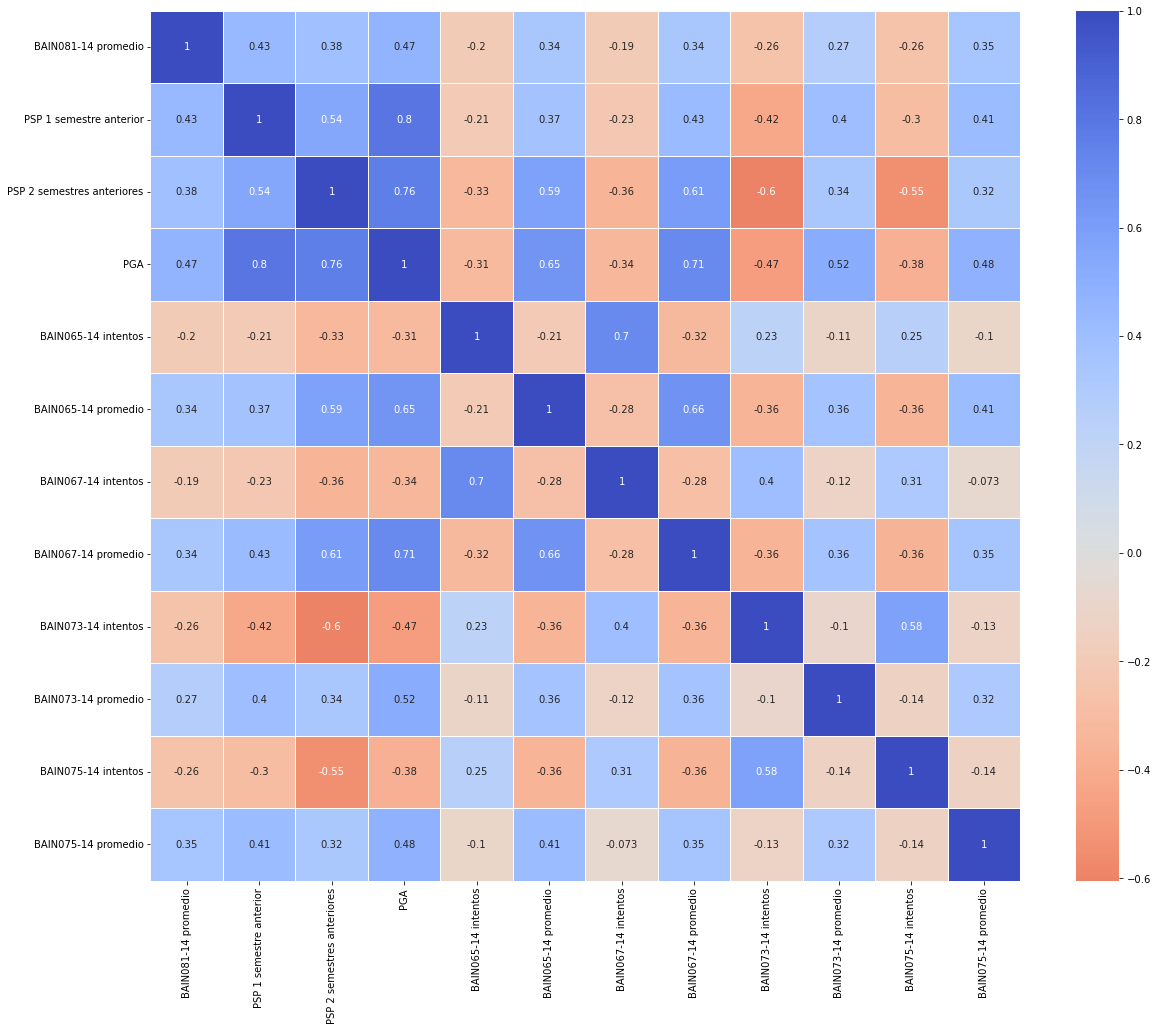

In [4]:
continuas_y_ordinales = ["BAIN081-14 promedio", "PSP 1 semestre anterior", "PSP 2 semestres anteriores", "PGA", "BAIN065-14 intentos", "BAIN065-14 promedio", "BAIN067-14 intentos", "BAIN067-14 promedio", "BAIN073-14 intentos", "BAIN073-14 promedio", "BAIN075-14 intentos", "BAIN075-14 promedio"]

correlation_matrix = datos[continuas_y_ordinales].corr()

# Crea un mapa de calor con colores que representan el nivel de correlación
plt.figure(figsize=(20, 16))  # Ajusta el tamaño de la figura si es necesario
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm_r', center=0, linewidths=0.5, square=True)

# Muestra el mapa de calor
plt.show()

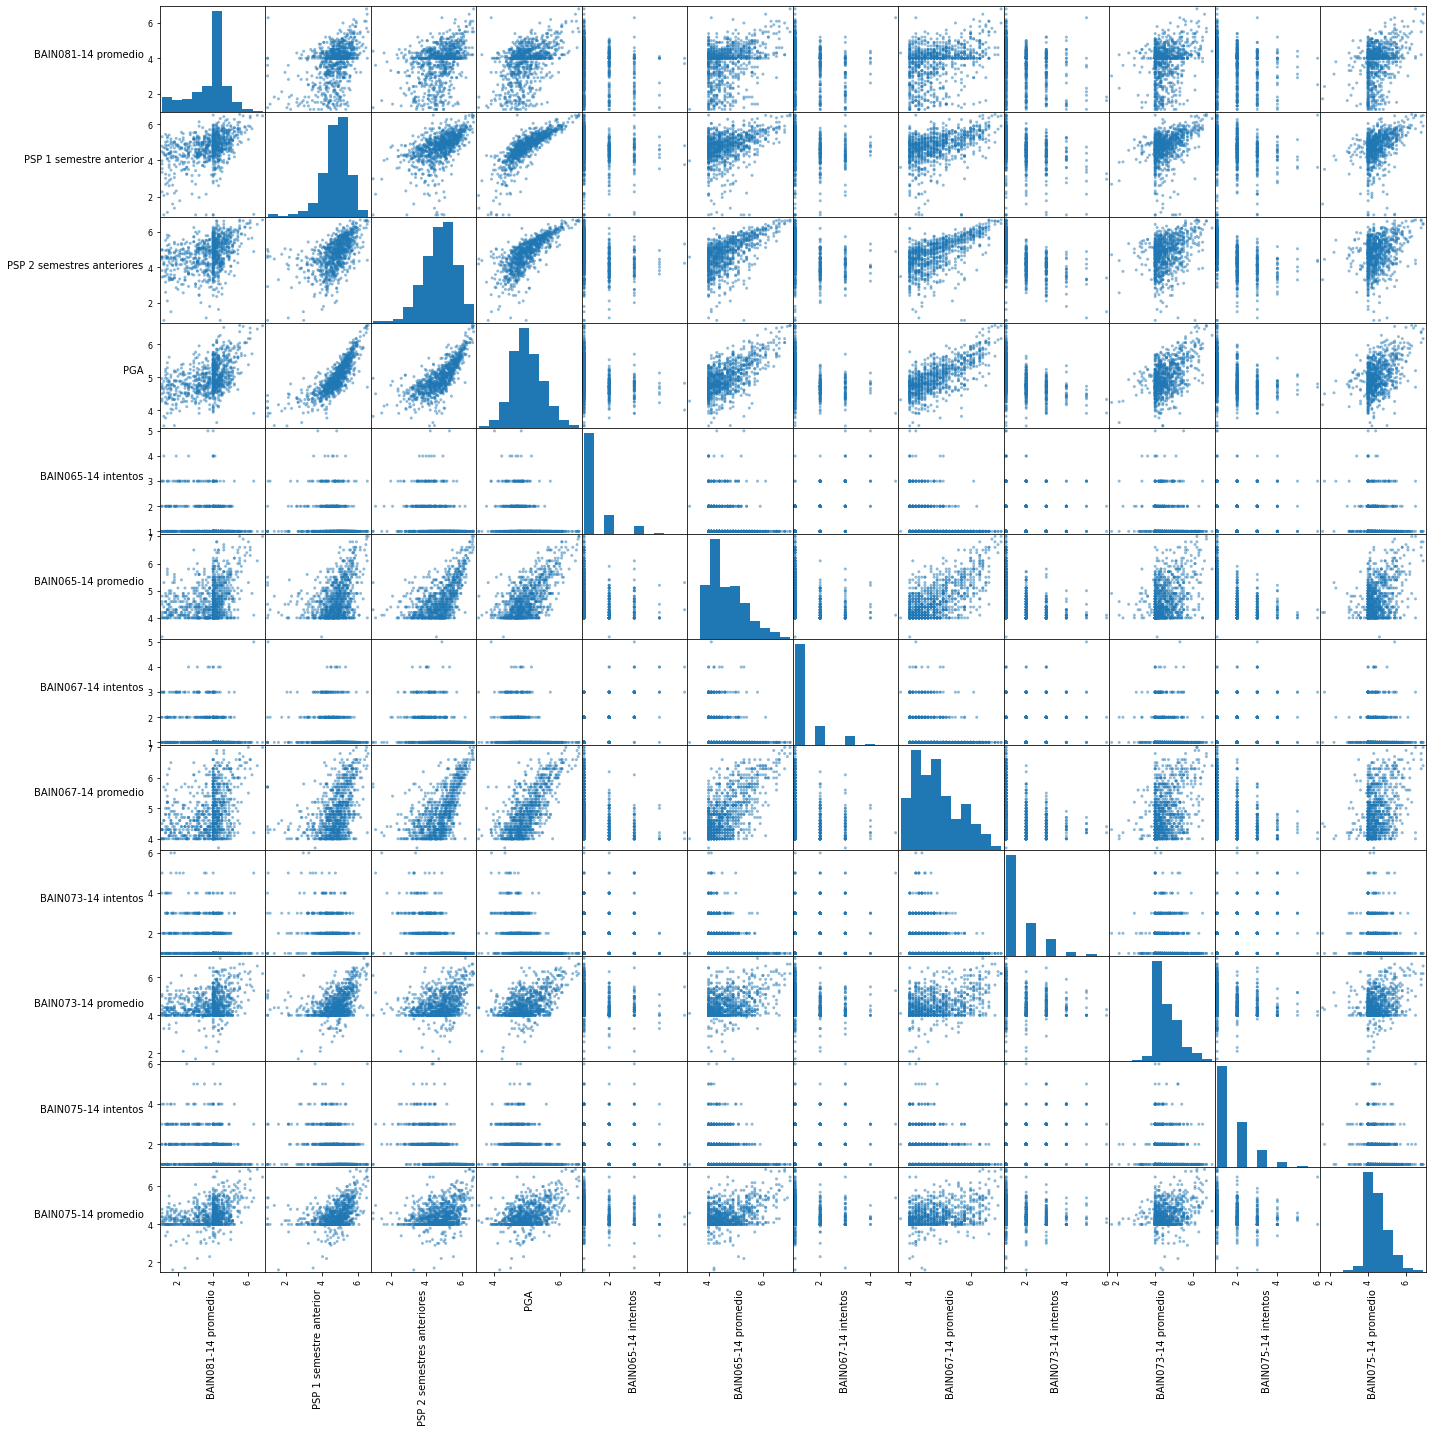

In [5]:
axes = pd.plotting.scatter_matrix(datos[continuas_y_ordinales], figsize=(20, 20));
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

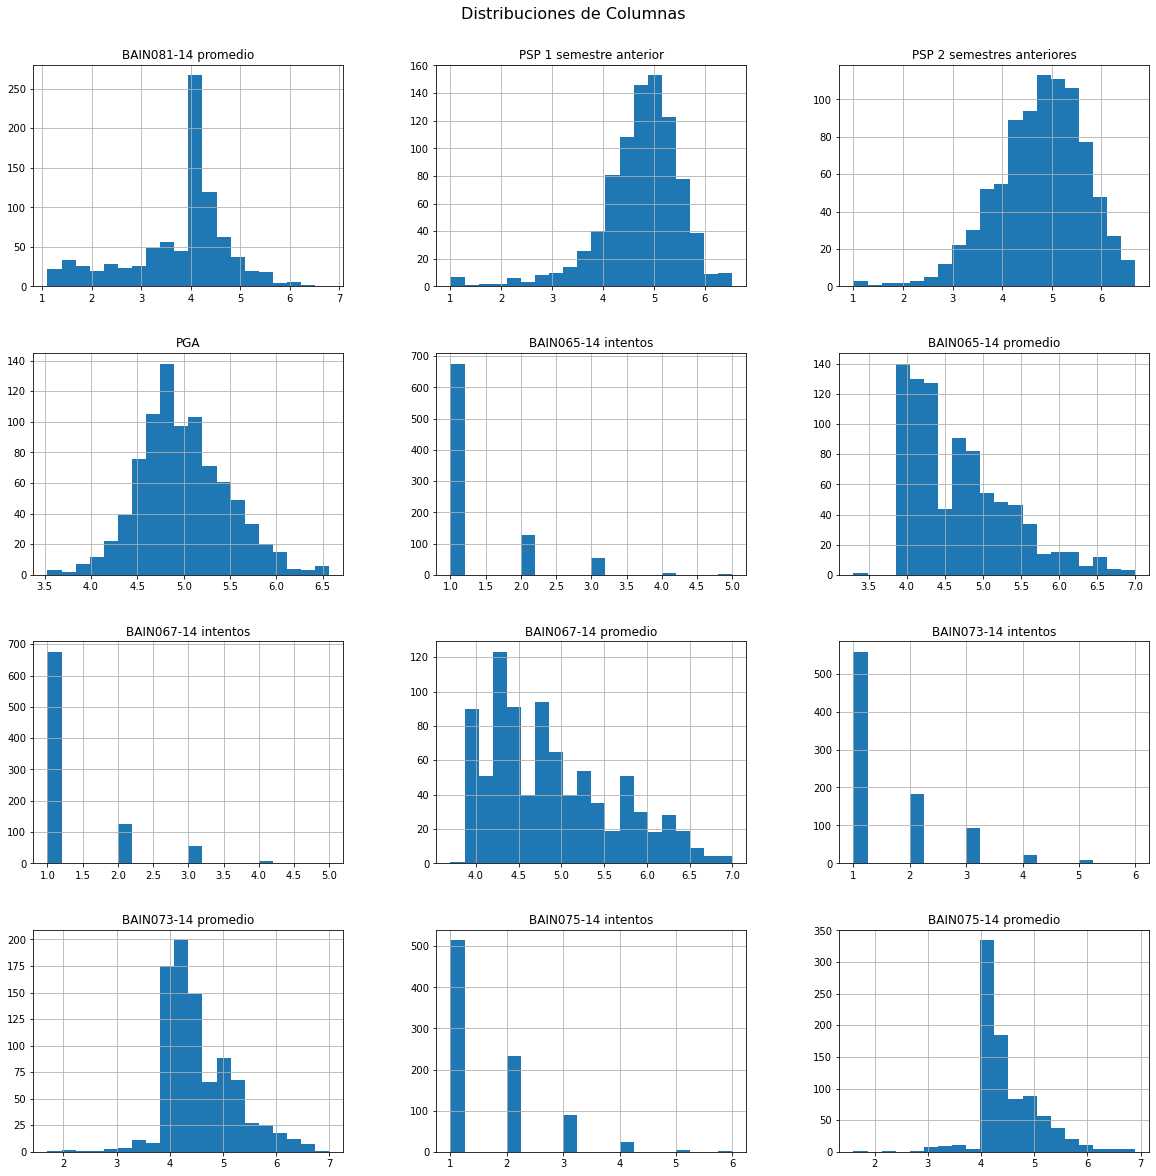

In [6]:
# Visualizar las distribuciones usando histogramas
datos[continuas_y_ordinales].hist(bins=20, figsize=(20, 20))
plt.suptitle('Distribuciones de Columnas', x=0.5, y=0.92, fontsize=16)
plt.show()

# Estandarización

In [7]:
continuas_y_ordinales = ["PSP 1 semestre anterior", "PSP 2 semestres anteriores", "PGA", "BAIN065-14 intentos", 
                         "BAIN065-14 promedio", "BAIN067-14 intentos", "BAIN067-14 promedio", "BAIN073-14 intentos", 
                         "BAIN073-14 promedio", "BAIN075-14 intentos", "BAIN075-14 promedio"]

In [8]:
datos_st = datos.copy()
datos_st[continuas_y_ordinales] = (datos_st[continuas_y_ordinales]-datos_st[continuas_y_ordinales].mean())/datos_st[continuas_y_ordinales].std()
datos_st.describe()

,BAIN081-14 promedio,BAIN081-14 online,PSP 1 semestre anterior,PSP 2 semestres anteriores,PGA,¿Congelo?,BAIN065-14 intentos,BAIN065-14 promedio,BAIN065-14 online,BAIN067-14 intentos,BAIN067-14 promedio,BAIN067-14 online,BAIN073-14 intentos,BAIN073-14 promedio,BAIN073-14 online,BAIN075-14 intentos,BAIN075-14 promedio,BAIN075-14 online
count,866.000000,866.000000,8.660000e+02,8.660000e+02,8.660000e+02,866.000000,8.660000e+02,8.660000e+02,866.000000,8.660000e+02,8.660000e+02,866.000000,8.660000e+02,8.660000e+02,866.000000,8.660000e+02,8.660000e+02,866.000000
mean,3.769746,0.498845,4.635758e-16,-8.204881e-18,-1.173298e-15,0.033487,5.128051e-17,9.681760e-16,0.362587,9.025370e-17,6.974149e-17,0.377598,9.640736e-17,-6.892100e-16,0.427252,-1.230732e-16,4.266538e-16,0.357968
std,1.039524,0.500288,1.000000e+00,1.000000e+00,1.000000e+00,0.180009,1.000000e+00,1.000000e+00,0.481025,1.000000e+00,1.000000e+00,0.485066,1.000000e+00,1.000000e+00,0.494965,1.000000e+00,1.000000e+00,0.479680
min,1.100000,0.000000,-4.634252e+00,-4.192150e+00,-3.064411e+00,0.000000,-4.739727e-01,-2.139820e+00,0.000000,-4.787930e-01,-1.621567e+00,0.000000,-6.260843e-01,-4.285432e+00,0.000000,-6.920612e-01,-4.686997e+00,0.000000
25%,3.200000,0.000000,-4.439172e-01,-6.210161e-01,-6.556159e-01,0.000000,-4.739727e-01,-7.630858e-01,0.000000,-4.787930e-01,-8.017905e-01,0.000000,-6.260843e-01,-6.888878e-01,0.000000,-6.920612e-01,-7.736661e-01,0.000000
50%,4.000000,0.000000,1.263651e-01,1.121675e-01,-1.110189e-01,0.000000,-4.739727e-01,-3.041745e-01,0.000000,-4.787930e-01,-2.552729e-01,0.000000,-6.260843e-01,-2.393197e-01,0.000000,-6.920612e-01,-2.844997e-01,0.000000
75%,4.400000,1.000000,6.222628e-01,7.003871e-01,6.220926e-01,0.000000,-4.739727e-01,6.136481e-01,1.000000,-4.787930e-01,6.669755e-01,1.000000,5.034761e-01,5.099604e-01,1.000000,4.784955e-01,5.307775e-01,1.000000
max,6.800000,1.000000,2.233930e+00,2.141665e+00,3.303186e+00,1.000000,5.768771e+00,3.520086e+00,1.000000,5.732963e+00,2.887203e+00,1.000000,5.021718e+00,3.656937e+00,1.000000,5.160722e+00,3.954942e+00,1.000000


In [9]:
# Lista de nombres de las columnas que son variables categóricas
columnas_categoricas = ['Carrera', 'Año de ingreso']

# Aplicar One-Hot Encoding a las variables categóricas con valores 1 y 0
datos_st_encoded = pd.get_dummies(datos_st, columns=columnas_categoricas, drop_first=True, dtype=int)
datos_st_encoded

,BAIN081-14 promedio,BAIN081-14 online,PSP 1 semestre anterior,PSP 2 semestres anteriores,PGA,¿Congelo?,BAIN065-14 intentos,BAIN065-14 promedio,BAIN065-14 online,BAIN067-14 intentos,BAIN067-14 promedio,BAIN067-14 online,BAIN073-14 intentos,BAIN073-14 promedio,BAIN073-14 online,BAIN075-14 intentos,BAIN075-14 promedio,BAIN075-14 online,Carrera_1708,Carrera_1730,Carrera_1736,Carrera_1737,Carrera_1740,Carrera_1779,Carrera_1807,Carrera_1812,Año de ingreso_2016,Año de ingreso_2017,Año de ingreso_2018,Año de ingreso_2019,Año de ingreso_2020,Año de ingreso_2021,Año de ingreso_2022
0,4.2,0,-1.026597,-0.534595,-0.948861,0,-0.473973,-1.069027,0,-0.478793,0.017986,0,0.503476,-0.838744,0,0.478495,-0.610611,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,4.7,0,1.130558,1.372240,1.711287,0,-0.473973,1.837412,0,-0.478793,1.930797,0,-0.626084,1.259241,0,-0.692061,1.509110,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,4.1,0,-0.307545,0.692024,-0.194803,0,-0.473973,0.460678,0,-0.478793,0.974392,0,-0.626084,-0.688888,0,-0.692061,-0.284500,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,4.2,0,-2.303533,-0.423084,-2.854950,0,-0.473973,-0.916056,0,-0.478793,-1.075049,0,-0.626084,-3.686008,0,-0.692061,-0.610611,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,4.0,0,-0.629879,0.703175,-0.446156,0,-0.473973,0.307707,0,-0.478793,1.247650,0,-0.626084,0.509960,0,-0.692061,-0.284500,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,3.0,0,-0.381930,-1.883876,-1.661026,0,-0.473973,-0.916056,1,-0.478793,-1.075049,1,1.633037,-0.539032,0,1.649052,-0.773666,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
862,3.0,0,-0.629879,0.145621,-0.948861,0,-0.473973,0.460678,0,-0.478793,0.154615,0,-0.626084,-0.389176,0,-0.692061,-0.610611,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
863,1.6,0,-1.572084,-1.304020,-1.996163,0,-0.473973,-0.916056,1,-0.478793,-0.528532,1,1.633037,0.210248,0,1.649052,0.530777,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
864,6.1,0,1.998379,2.097060,3.135618,0,-0.473973,2.755234,0,-0.478793,2.340685,0,-0.626084,2.607945,0,-0.692061,3.139665,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Regresion Lineal Multiple

In [10]:
Y = datos_st_encoded.iloc[:,0]
X = datos_st_encoded.iloc[:,1:]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

In [11]:
hatY = model.predict(X)
resid = Y - hatY

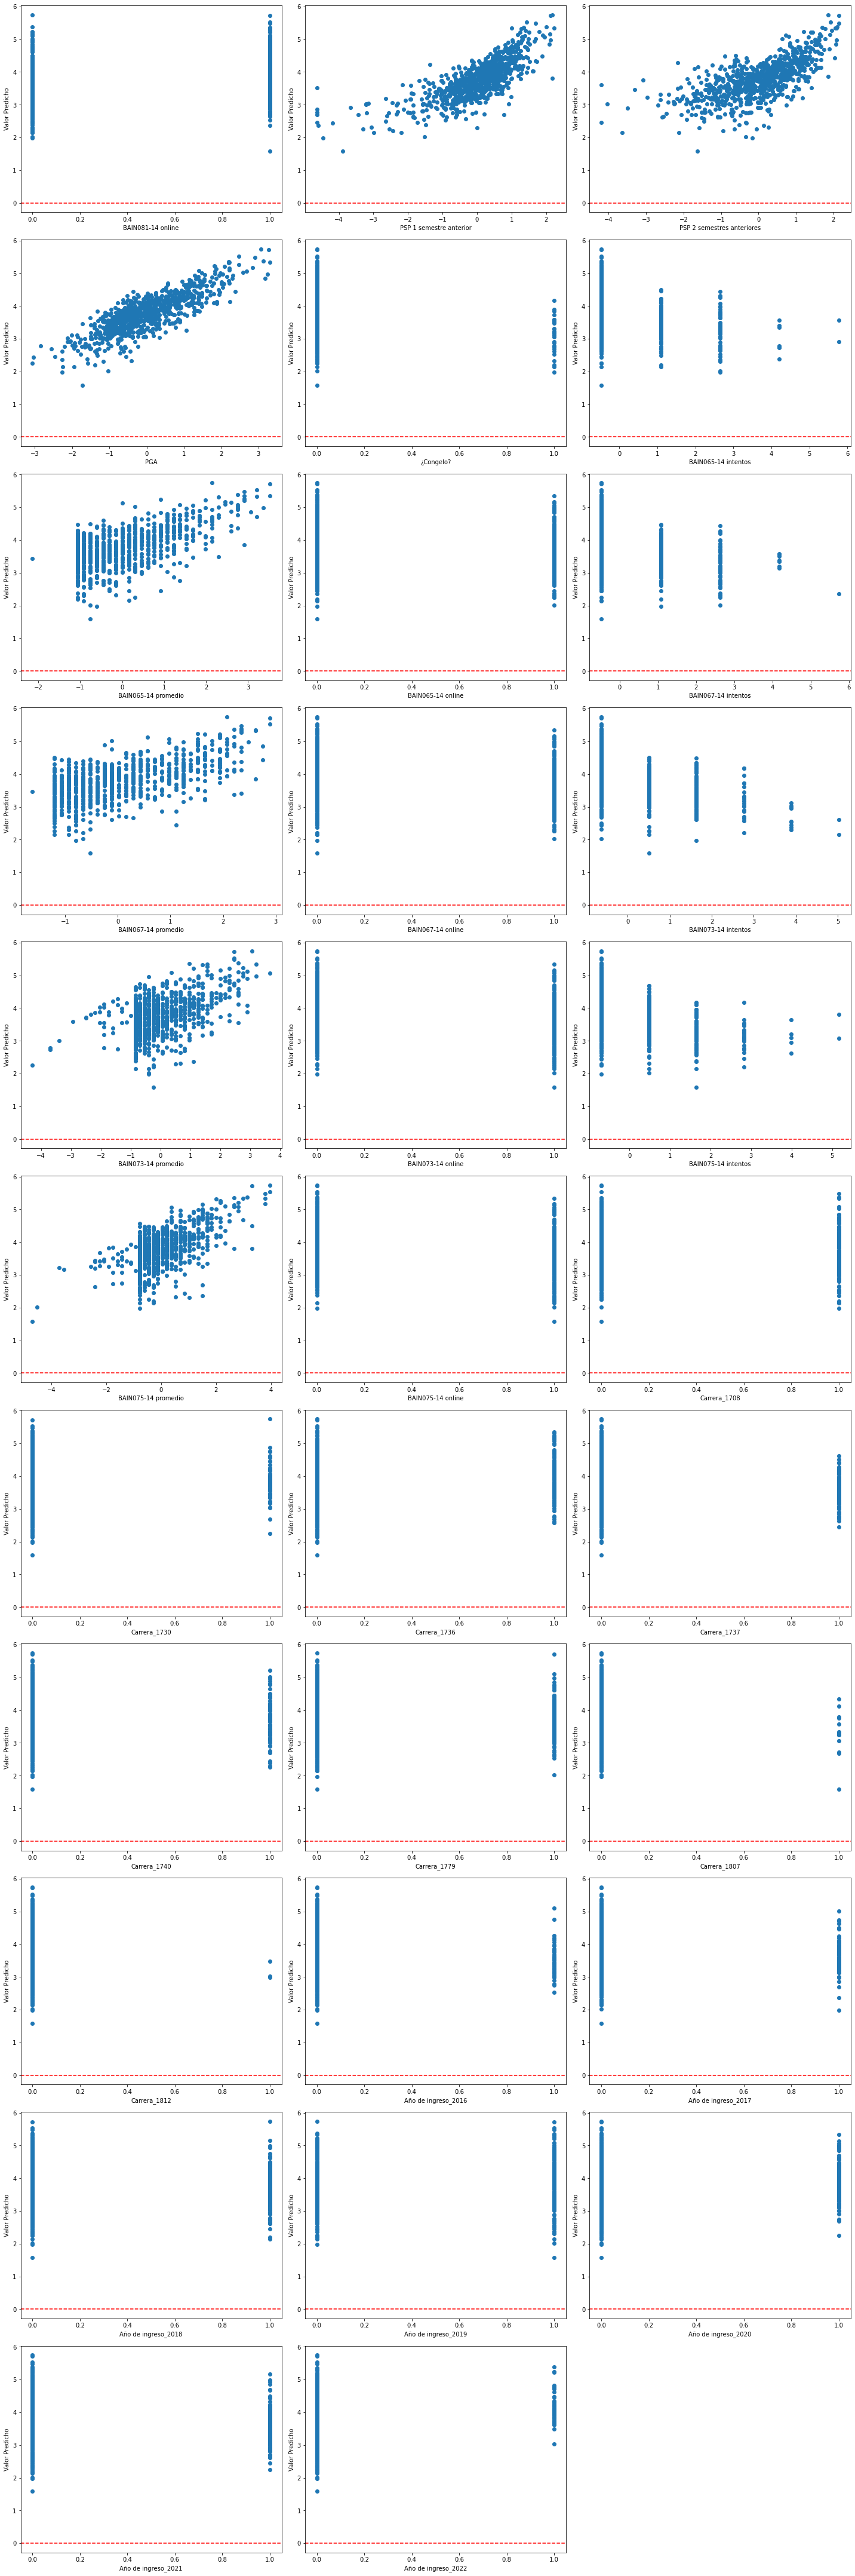

In [12]:
columns = datos_st_encoded.columns[1:]

num_plots = len(columns)
num_cols = 3
num_rows = -(-num_plots // num_cols)  # Redondeo hacia arriba para el número de filas

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 60))  # Ajusta el tamaño de la figura según tu preferencia

for idx, var_name in enumerate(columns):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]  # Manejo de subplots en una fila

    # Gráfico de dispersión para cada variable con la línea horizontal en y=0
    ax.scatter(datos_st_encoded[var_name], hatY)
    ax.axhline(0, color='red', linestyle='--')
    ax.set_xlabel(var_name)
    ax.set_ylabel('Valor Predicho')

# Oculta los subplots que no se están utilizando si el número de gráficos no llena completamente la última fila
for idx in range(num_plots, num_rows * num_cols):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    ax.axis('off')

plt.tight_layout()
plt.show()

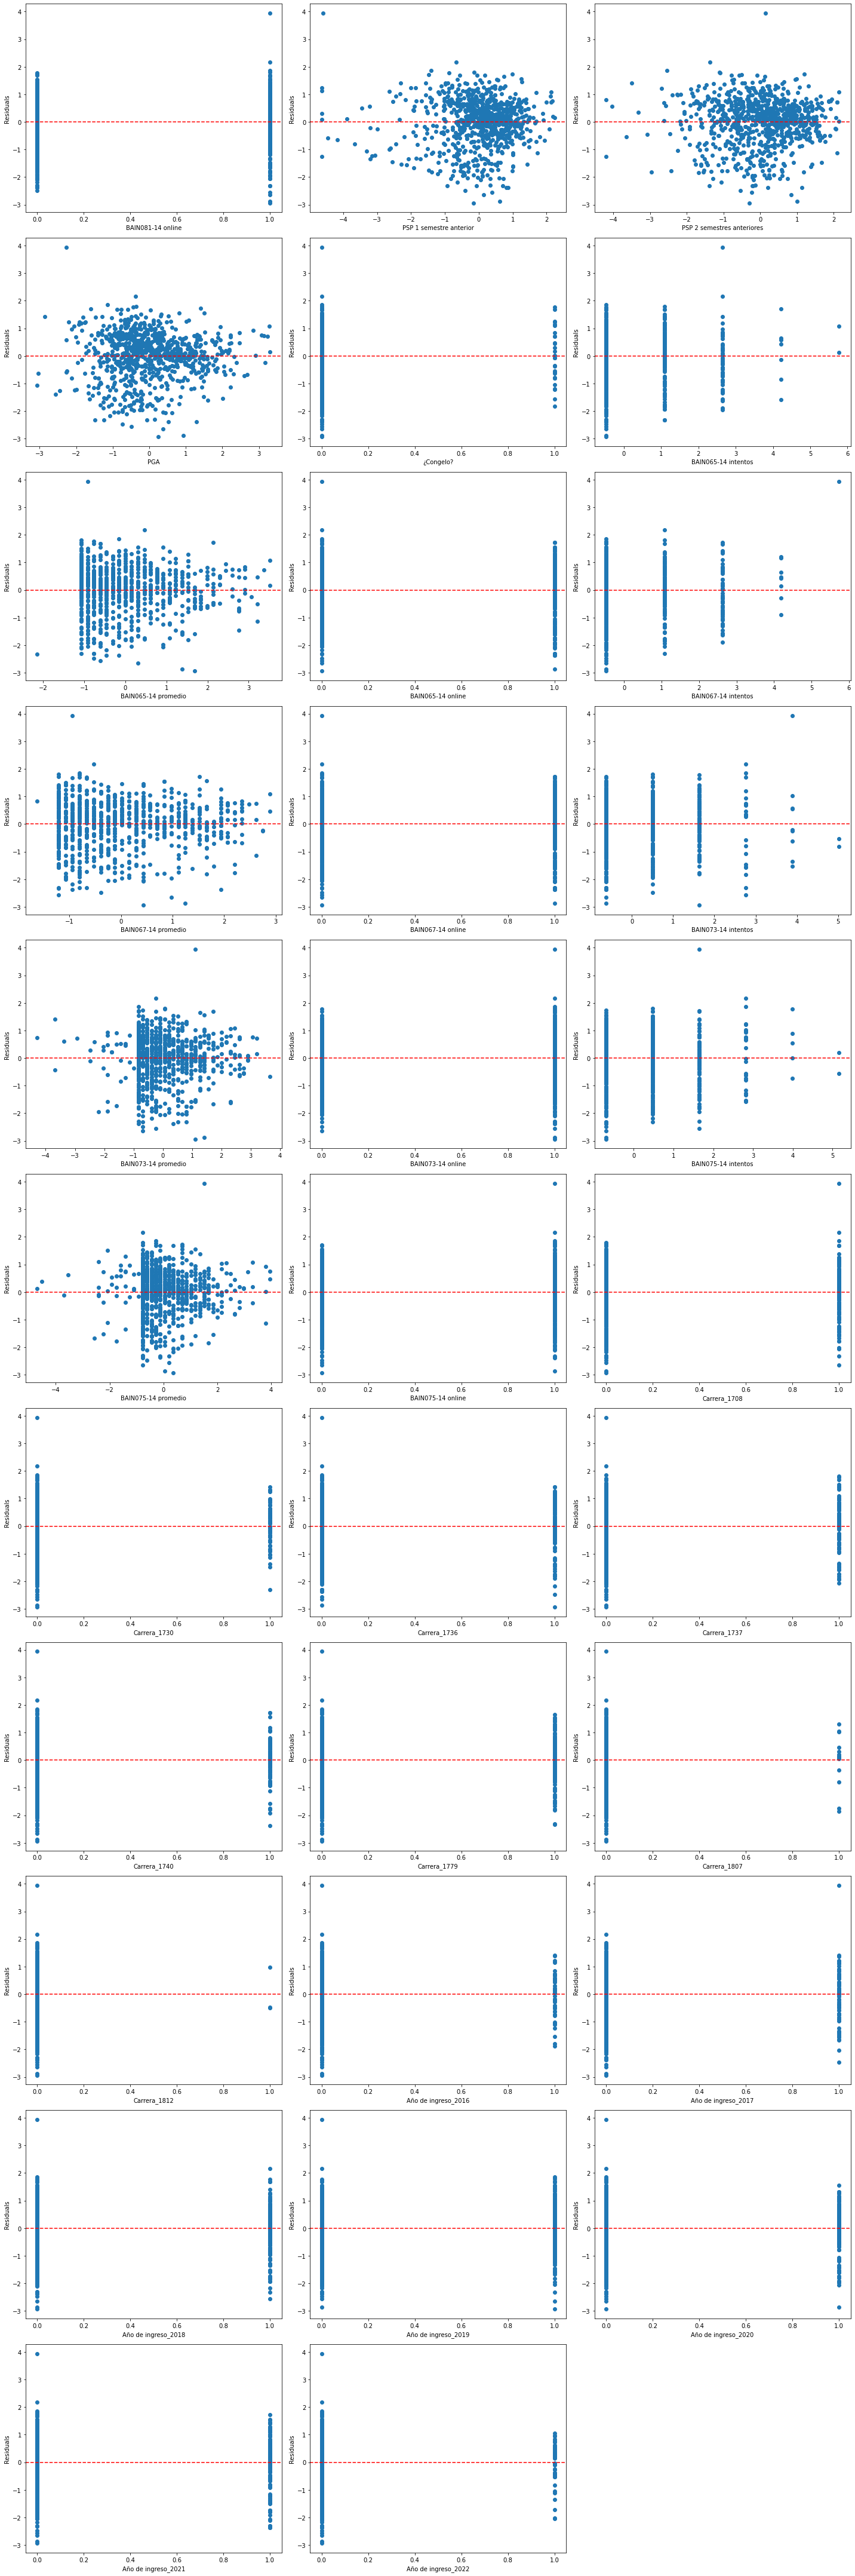

In [13]:
# Suponiendo que datos_st_encoded es un DataFrame con las variables, Y es una lista/array y hatY es una lista/array de valores predichos

columns = datos_st_encoded.columns[1:]

num_plots = len(columns)
num_cols = 3
num_rows = -(-num_plots // num_cols)  # Redondeo hacia arriba para el número de filas

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 60))  # Ajusta el tamaño de la figura según tu preferencia

for idx, var_name in enumerate(columns):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]  # Manejo de subplots en una fila

    # Gráfico de dispersión de residuos para cada variable con la línea horizontal en y=0
    residuals = Y - hatY
    ax.scatter(datos_st_encoded[var_name], residuals)
    ax.axhline(0, color='red', linestyle='--')
    ax.set_xlabel(var_name)
    ax.set_ylabel('Residuals')

# Oculta los subplots que no se están utilizando si el número de gráficos no llena completamente la última fila
for idx in range(num_plots, num_rows * num_cols):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    ax.axis('off')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Residuals')

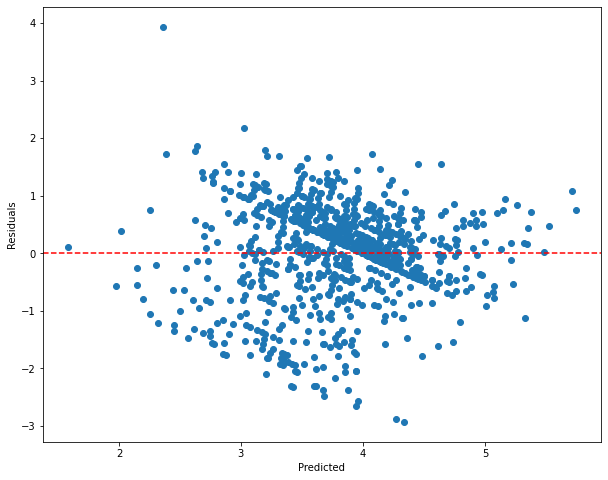

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(hatY, resid)
ax.axhline(0, color='red', linestyle='--')
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')

In [15]:
print(stats.shapiro(resid))

ShapiroResult(statistic=0.969217836856842, pvalue=1.4845056607593055e-12)


In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = datos_st_encoded.iloc[:,1:].columns
vif["VIF"] = [variance_inflation_factor(datos_st_encoded.iloc[:,1:].values, i) for i in range(datos_st_encoded.iloc[:,1:].shape[1])]
vif = vif[vif['Variable']!='intercept']
vif = vif[vif['Variable']!='const']
display(vif)

,Variable,VIF
0,BAIN081-14 online,5.716378
1,PSP 1 semestre anterior,4.215835
2,PSP 2 semestres anteriores,3.650698
3,PGA,9.750541
4,¿Congelo?,1.128489
5,BAIN065-14 intentos,2.321765
6,BAIN065-14 promedio,2.611311
7,BAIN065-14 online,26.593515
8,BAIN067-14 intentos,2.883433
9,BAIN067-14 promedio,2.853391


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


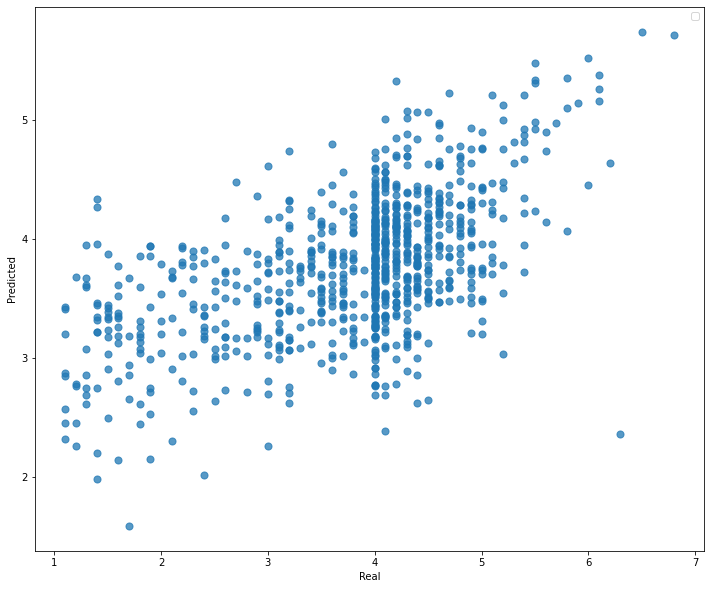

In [17]:
fig, ax = plt.subplots(figsize=(12, 10))

# Gráfico de dispersión
ax.scatter(Y, hatY, alpha=0.75, s=50)

ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
ax.legend()
plt.show()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     BAIN081-14 promedio   R-squared:                       0.323
Model:                             OLS   Adj. R-squared:                  0.297
Method:                  Least Squares   F-statistic:                     12.40
Date:                 Mon, 18 Dec 2023   Prob (F-statistic):           3.23e-51
Time:                         15:25:45   Log-Likelihood:                -1093.2
No. Observations:                  866   AIC:                             2252.
Df Residuals:                      833   BIC:                             2410.
Df Model:                           32                                         
Covariance Type:             nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          3.9023      0.243     16.044      0.000       3.425       4.380
BAIN081-14 online              0.2513      0.100      2.506      0.012       0.054       0.448
PSP 1 semestre anterior        0.1073      0.061      1.763      0.078      -0.012       0.227
PSP 2 semestres anteriores     0.0233      0.057      0.411      0.681      -0.088       0.134
PGA                            0.2328      0.093      2.515      0.012       0.051       0.415
¿Congelo?                     -0.2970      0.172     -1.727      0.085      -0.635       0.041
BAIN065-14 intentos           -0.0683      0.045     -1.511      0.131      -0.157       0.020
BAIN065-14 promedio            0.0124      0.048      0.258      0.796      -0.082       0.107
BAIN065-14 online             -0.1075      0.254     -0.423      0.672      -0.606       0.391
BAIN067-14 intentos            0.0137      0.051      0.271      0.786      -0.086       0.113
BAIN067-14 promedio            0.0154      0.050      0.308      0.758      -0.083       0.114
BAIN067-14 online             -0.3357      0.254     -1.319      0.187      -0.835       0.164
BAIN073-14 intentos           -0.0982      0.046     -2.115      0.035      -0.189      -0.007
BAIN073-14 promedio            0.0819      0.039      2.110      0.035       0.006       0.158
BAIN073-14 online              0.1109      0.108      1.029      0.304      -0.101       0.322
BAIN075-14 intentos           -0.0369      0.042     -0.884      0.377      -0.119       0.045
BAIN075-14 promedio            0.0955      0.038      2.544      0.011       0.022       0.169
BAIN075-14 online             -0.3576      0.109     -3.272      0.001      -0.572      -0.143
Carrera_1708                  -0.1534      0.098     -1.560      0.119      -0.346       0.040
Carrera_1730                  -0.0560      0.135     -0.414      0.679      -0.321       0.209
Carrera_1736                   0.1670      0.114      1.463      0.144      -0.057       0.391
Carrera_1737                  -0.1804      0.116     -1.553      0.121      -0.408       0.048
Carrera_1740                   0.0694      0.123      0.562      0.574      -0.173       0.312
Carrera_1779                  -0.0231      0.105     -0.221      0.825      -0.228       0.182
Carrera_1807                  -0.7202      0.245     -2.934      0.003      -1.202      -0.238
Carrera_1812                  -0.1022      0.523     -0.195      0.845      -1.129       0.925
Año de ingreso_2016           -0.0885      0.256     -0.346      0.729      -0.591       0.414
Año de ingreso_2017           -0.0364      0.250     -0.146      0.884      -0.526       0.454
Año de ingreso_2018            0.1057      0.245      0.432      0.666      -0.375       0.586
Año de ingreso_2019           -0

# Variables significativas

In [19]:
variables = [['BAIN081-14 online'], ['PSP 1 semestre anterior'],
       ['PSP 2 semestres anteriores'], ['PGA'], ['¿Congelo?'], ['BAIN065-14 intentos'],
       ['BAIN065-14 promedio'], ['BAIN065-14 online'], ['BAIN067-14 intentos'],
       ['BAIN067-14 promedio'], ['BAIN067-14 online'], ['BAIN073-14 intentos'],
       ['BAIN073-14 promedio'], ['BAIN073-14 online'], ['BAIN075-14 intentos'],
       ['BAIN075-14 promedio'], ['BAIN075-14 online']]

In [20]:
Y = datos_st.iloc[:,0]
max_rajustado = 0
for i in variables:
    X = datos_st[i]
    X = sm.add_constant(X)

    model = sm.OLS(Y, X).fit()
    if(model.rsquared_adj > max_rajustado):
        variable1 = i
        max_rajustado = model.rsquared_adj
        
print(variable1)

['PGA']


In [21]:
Y = datos_st.iloc[:,0]
X = datos_st[variable1]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     BAIN081-14 promedio   R-squared:                       0.222
Model:                             OLS   Adj. R-squared:                  0.221
Method:                  Least Squares   F-statistic:                     246.3
Date:                 Mon, 18 Dec 2023   Prob (F-statistic):           4.98e-49
Time:                         15:25:46   Log-Likelihood:                -1153.3
No. Observations:                  866   AIC:                             2311.
Df Residuals:                      864   BIC:                             2320.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7697      0.031    120.908      0.000       3.709       3.831
PGA            0.4896      0.031     15.695      0.000       0.428       0.551
==============================================================================
Omnibus:                       68.091   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.583
Skew:                          -0.720   Prob(JB):                     1.17e-18
Kurtosis:                       3.465   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
variables.remove(variable1)
Y = datos_st.iloc[:,0]
max_rajustado = 0
for i in variables:
    X = datos_st[variable1 + i]
    X = sm.add_constant(X)

    model = sm.OLS(Y, X).fit()
    if(model.rsquared_adj > max_rajustado):
        variable2 = variable1 + i
        max_rajustado = model.rsquared_adj
        
print(variable2)

['PGA', 'BAIN067-14 online']


In [23]:
Y = datos_st.iloc[:,0]
X = datos_st[variable2]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     BAIN081-14 promedio   R-squared:                       0.248
Model:                             OLS   Adj. R-squared:                  0.246
Method:                  Least Squares   F-statistic:                     142.4
Date:                 Mon, 18 Dec 2023   Prob (F-statistic):           3.71e-54
Time:                         15:25:46   Log-Likelihood:                -1138.4
No. Observations:                  866   AIC:                             2283.
Df Residuals:                      863   BIC:                             2297.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.9037      0.039     99.582      0.000       3.827       3.981
PGA                   0.5254      0.031     16.749      0.000       0.464       0.587
BAIN067-14 online    -0.3548      0.065     -5.486      0.000      -0.482      -0.228
==============================================================================
Omnibus:                       61.548   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.064
Skew:                          -0.682   Prob(JB):                     1.36e-16
Kurtosis:                       3.404   Cond. No.                         2.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
variable1 = variable2.copy()
variables.remove([variable2[-1]])
Y = datos_st.iloc[:,0]
max_rajustado = 0
for i in variables:
    X = datos_st[variable1 + i]
    X = sm.add_constant(X)

    model = sm.OLS(Y, X).fit()
    if(model.rsquared_adj > max_rajustado):
        variable2 = variable1 + i
        max_rajustado = model.rsquared_adj
        
print(variable2)

['PGA', 'BAIN067-14 online', 'BAIN075-14 promedio']


In [25]:
Y = datos_st.iloc[:,0]
X = datos_st[variable2]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     BAIN081-14 promedio   R-squared:                       0.259
Model:                             OLS   Adj. R-squared:                  0.256
Method:                  Least Squares   F-statistic:                     100.2
Date:                 Mon, 18 Dec 2023   Prob (F-statistic):           1.22e-55
Time:                         15:25:46   Log-Likelihood:                -1132.3
No. Observations:                  866   AIC:                             2273.
Df Residuals:                      862   BIC:                             2292.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.8818      0.039     98.394      0.000       3.804       3.959
PGA                     0.4597      0.036     12.625      0.000       0.388       0.531
BAIN067-14 online      -0.2968      0.066     -4.473      0.000      -0.427      -0.167
BAIN075-14 promedio     0.1251      0.036      3.487      0.001       0.055       0.195
==============================================================================
Omnibus:                       61.051   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.302
Skew:                          -0.694   Prob(JB):                     1.99e-16
Kurtosis:                       3.280   Cond. No.                         2.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
variable1 = variable2.copy()
variables.remove(['BAIN075-14 promedio'])
Y = datos_st.iloc[:,0]
max_rajustado = 0
for i in variables:
    X = datos_st[variable1 + i]
    X = sm.add_constant(X)

    model = sm.OLS(Y, X).fit()
    if(model.rsquared_adj > max_rajustado):
        variable2 = variable1 + i
        max_rajustado = model.rsquared_adj
        
print(variable2)

['PGA', 'BAIN067-14 online', 'BAIN075-14 promedio', 'BAIN075-14 intentos']


In [27]:
Y = datos_st.iloc[:,0]
X = datos_st[variable2]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     BAIN081-14 promedio   R-squared:                       0.267
Model:                             OLS   Adj. R-squared:                  0.264
Method:                  Least Squares   F-statistic:                     78.46
Date:                 Mon, 18 Dec 2023   Prob (F-statistic):           9.05e-57
Time:                         15:25:46   Log-Likelihood:                -1127.3
No. Observations:                  866   AIC:                             2265.
Df Residuals:                      861   BIC:                             2288.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.8798      0.039     98.848      0.000       3.803       3.957
PGA                     0.4167      0.039     10.775      0.000       0.341       0.493
BAIN067-14 online      -0.2915      0.066     -4.414      0.000      -0.421      -0.162
BAIN075-14 promedio     0.1315      0.036      3.679      0.000       0.061       0.202
BAIN075-14 intentos    -0.1043      0.033     -3.179      0.002      -0.169      -0.040
==============================================================================
Omnibus:                       59.501   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.097
Skew:                          -0.679   Prob(JB):                     6.01e-16
Kurtosis:                       3.317   Cond. No.                         3.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
variable1 = variable2.copy()
variables.remove(['BAIN075-14 intentos'])
Y = datos_st.iloc[:,0]
max_rajustado = 0
for i in variables:
    X = datos_st[variable1 + i]
    X = sm.add_constant(X)

    model = sm.OLS(Y, X).fit()
    if(model.rsquared_adj > max_rajustado):
        variable2 = variable1 + i
        max_rajustado = model.rsquared_adj
        
print(variable2)

['PGA', 'BAIN067-14 online', 'BAIN075-14 promedio', 'BAIN075-14 intentos', 'PSP 1 semestre anterior']


In [29]:
Y = datos_st.iloc[:,0]
X = datos_st[variable2]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     BAIN081-14 promedio   R-squared:                       0.275
Model:                             OLS   Adj. R-squared:                  0.271
Method:                  Least Squares   F-statistic:                     65.15
Date:                 Mon, 18 Dec 2023   Prob (F-statistic):           1.02e-57
Time:                         15:25:46   Log-Likelihood:                -1122.8
No. Observations:                  866   AIC:                             2258.
Df Residuals:                      860   BIC:                             2286.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       3.8846      0.039     99.346      0.000       3.808       3.961
PGA                         0.2981      0.055      5.402      0.000       0.190       0.406
BAIN067-14 online          -0.3040      0.066     -4.616      0.000      -0.433      -0.175
BAIN075-14 promedio         0.1245      0.036      3.493      0.001       0.055       0.194
BAIN075-14 intentos        -0.1042      0.033     -3.190      0.001      -0.168      -0.040
PSP 1 semestre anterior     0.1531      0.051      3.000      0.003       0.053       0.253
==============================================================================
Omnibus:                       56.507   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.569
Skew:                          -0.634   Prob(JB):                     3.51e-15
Kurtosis:                       3.485   Cond. No.                         3.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
variable1 = variable2.copy()
variables.remove(['PSP 1 semestre anterior'])
Y = datos_st.iloc[:,0]
max_rajustado = 0
for i in variables:
    X = datos_st[variable1 + i]
    X = sm.add_constant(X)

    model = sm.OLS(Y, X).fit()
    if(model.rsquared_adj > max_rajustado):
        variable2 = variable1 + i
        max_rajustado = model.rsquared_adj
        
print(variable2)

['PGA', 'BAIN067-14 online', 'BAIN075-14 promedio', 'BAIN075-14 intentos', 'PSP 1 semestre anterior', 'BAIN065-14 intentos']


In [31]:
Y = datos_st.iloc[:,0]
X = datos_st[variable2]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     BAIN081-14 promedio   R-squared:                       0.278
Model:                             OLS   Adj. R-squared:                  0.273
Method:                  Least Squares   F-statistic:                     55.25
Date:                 Mon, 18 Dec 2023   Prob (F-statistic):           9.71e-58
Time:                         15:25:46   Log-Likelihood:                -1120.6
No. Observations:                  866   AIC:                             2255.
Df Residuals:                      859   BIC:                             2288.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       3.8860      0.039     99.566      0.000       3.809       3.963
PGA                         0.2734      0.056      4.857      0.000       0.163       0.384
BAIN067-14 online          -0.3079      0.066     -4.682      0.000      -0.437      -0.179
BAIN075-14 promedio         0.1271      0.036      3.571      0.000       0.057       0.197
BAIN075-14 intentos        -0.0940      0.033     -2.851      0.004      -0.159      -0.029
PSP 1 semestre anterior     0.1613      0.051      3.158      0.002       0.061       0.262
BAIN065-14 intentos        -0.0678      0.032     -2.107      0.035      -0.131      -0.005
==============================================================================
Omnibus:                       55.906   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.441
Skew:                          -0.619   Prob(JB):                     3.74e-15
Kurtosis:                       3.557   Cond. No.                         3.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
variable1 = variable2.copy()
variables.remove(['BAIN065-14 intentos'])
Y = datos_st.iloc[:,0]
max_rajustado = 0
for i in variables:
    X = datos_st[variable1 + i]
    X = sm.add_constant(X)

    model = sm.OLS(Y, X).fit()
    if(model.rsquared_adj > max_rajustado):
        variable2 = variable1 + i
        max_rajustado = model.rsquared_adj
        
print(variable2)

['PGA', 'BAIN067-14 online', 'BAIN075-14 promedio', 'BAIN075-14 intentos', 'PSP 1 semestre anterior', 'BAIN065-14 intentos', 'BAIN081-14 online']


In [33]:
Y = datos_st.iloc[:,0]
X = datos_st[variable2]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     BAIN081-14 promedio   R-squared:                       0.281
Model:                             OLS   Adj. R-squared:                  0.276
Method:                  Least Squares   F-statistic:                     48.02
Date:                 Mon, 18 Dec 2023   Prob (F-statistic):           1.27e-57
Time:                         15:25:46   Log-Likelihood:                -1118.7
No. Observations:                  866   AIC:                             2253.
Df Residuals:                      858   BIC:                             2292.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       3.8251      0.050     75.829      0.000       3.726       3.924
PGA                         0.2788      0.056      4.953      0.000       0.168       0.389
BAIN067-14 online          -0.3017      0.066     -4.589      0.000      -0.431      -0.173
BAIN075-14 promedio         0.1228      0.036      3.449      0.001       0.053       0.193
BAIN075-14 intentos        -0.0865      0.033     -2.611      0.009      -0.152      -0.021
PSP 1 semestre anterior     0.1513      0.051      2.949      0.003       0.051       0.252
BAIN065-14 intentos        -0.0751      0.032     -2.319      0.021      -0.139      -0.012
BAIN081-14 online           0.1174      0.062      1.902      0.057      -0.004       0.239
==============================================================================
Omnibus:                       54.047   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.443
Skew:                          -0.613   Prob(JB):                     1.67e-14
Kurtosis:                       3.504   Cond. No.                         4.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Modelo final

In [34]:
Y = datos_st.iloc[:,0]
X = datos_st_encoded[['PGA', 'BAIN067-14 online', 'BAIN075-14 promedio', 'BAIN075-14 intentos', 'PSP 1 semestre anterior', 
              'Carrera_1708', 'Carrera_1730', 'Carrera_1736', 'Carrera_1737', 'Carrera_1740', 
              'Carrera_1779', 'Carrera_1807']]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     BAIN081-14 promedio   R-squared:                       0.291
Model:                             OLS   Adj. R-squared:                  0.281
Method:                  Least Squares   F-statistic:                     29.23
Date:                 Mon, 18 Dec 2023   Prob (F-statistic):           4.15e-56
Time:                         15:25:46   Log-Likelihood:                -1112.7
No. Observations:                  866   AIC:                             2251.
Df Residuals:                      853   BIC:                             2313.
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       3.9853      0.070     56.800      0.000       3.848       4.123
PGA                         0.3027      0.056      5.371      0.000       0.192       0.413
BAIN067-14 online          -0.3051      0.066     -4.607      0.000      -0.435      -0.175
BAIN075-14 promedio         0.1237      0.036      3.446      0.001       0.053       0.194
BAIN075-14 intentos        -0.1023      0.033     -3.135      0.002      -0.166      -0.038
PSP 1 semestre anterior     0.1525      0.052      2.940      0.003       0.051       0.254
Carrera_1708               -0.2063      0.095     -2.174      0.030      -0.393      -0.020
Carrera_1730               -0.1380      0.131     -1.056      0.291      -0.394       0.118
Carrera_1736                0.0903      0.109      0.832      0.405      -0.123       0.303
Carrera_1737               -0.2600      0.112     -2.314      0.021      -0.481      -0.039
Carrera_1740               -0.0701      0.118     -0.592      0.554      -0.302       0.162
Carrera_1779               -0.0904      0.096     -0.940      0.348      -0.279       0.098
Carrera_1807               -0.7241      0.245     -2.954      0.003      -1.205      -0.243
==============================================================================
Omnibus:                       59.526   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.198
Skew:                          -0.634   Prob(JB):                     2.10e-16
Kurtosis:                       3.627   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
hatY = model.predict(X)
resid = Y - hatY

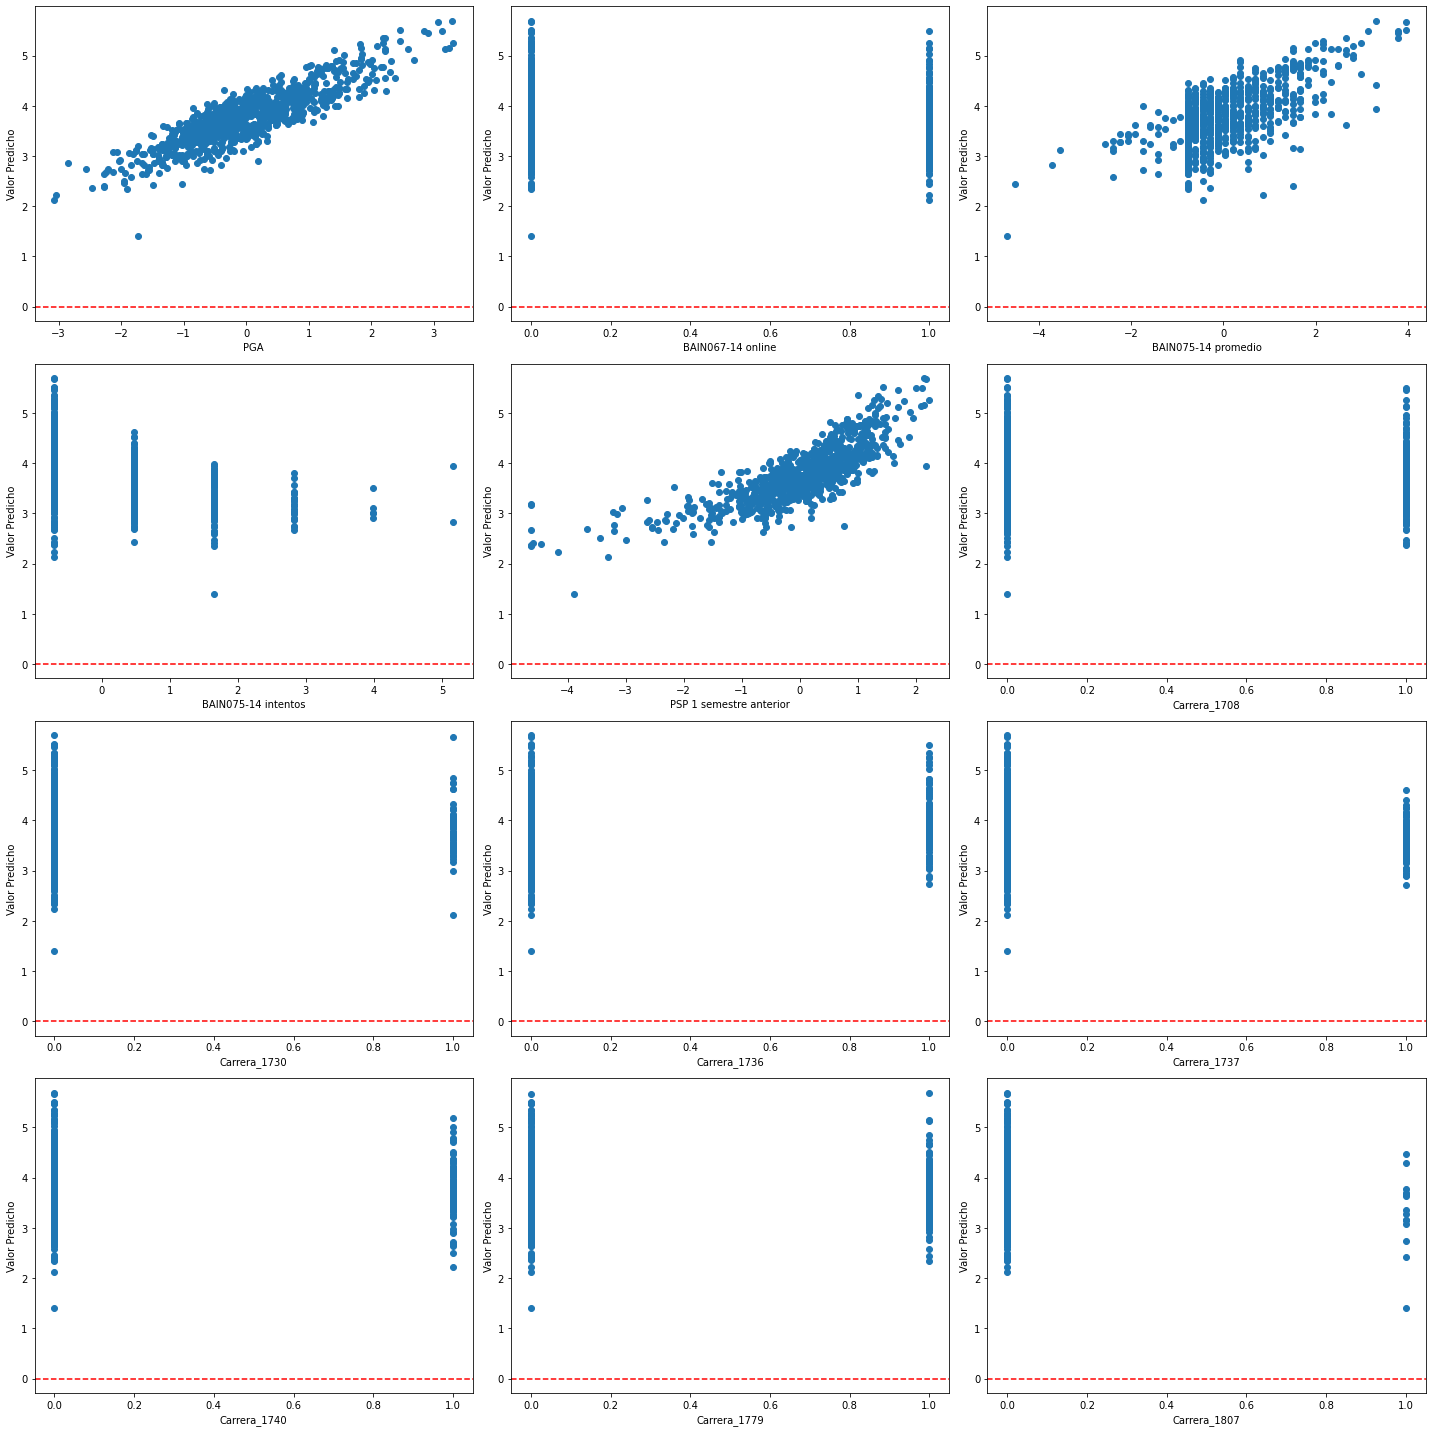

In [36]:
columns = X.columns[1:]

num_plots = len(columns)
num_cols = 3
num_rows = -(-num_plots // num_cols)  # Redondeo hacia arriba para el número de filas

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))  # Ajusta el tamaño de la figura según tu preferencia

for idx, var_name in enumerate(columns):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]  # Manejo de subplots en una fila

    # Gráfico de dispersión para cada variable con la línea horizontal en y=0
    ax.scatter(X[var_name], hatY)
    ax.axhline(0, color='red', linestyle='--')
    ax.set_xlabel(var_name)
    ax.set_ylabel('Valor Predicho')

# Oculta los subplots que no se están utilizando si el número de gráficos no llena completamente la última fila
for idx in range(num_plots, num_rows * num_cols):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    ax.axis('off')

plt.tight_layout()
plt.show()

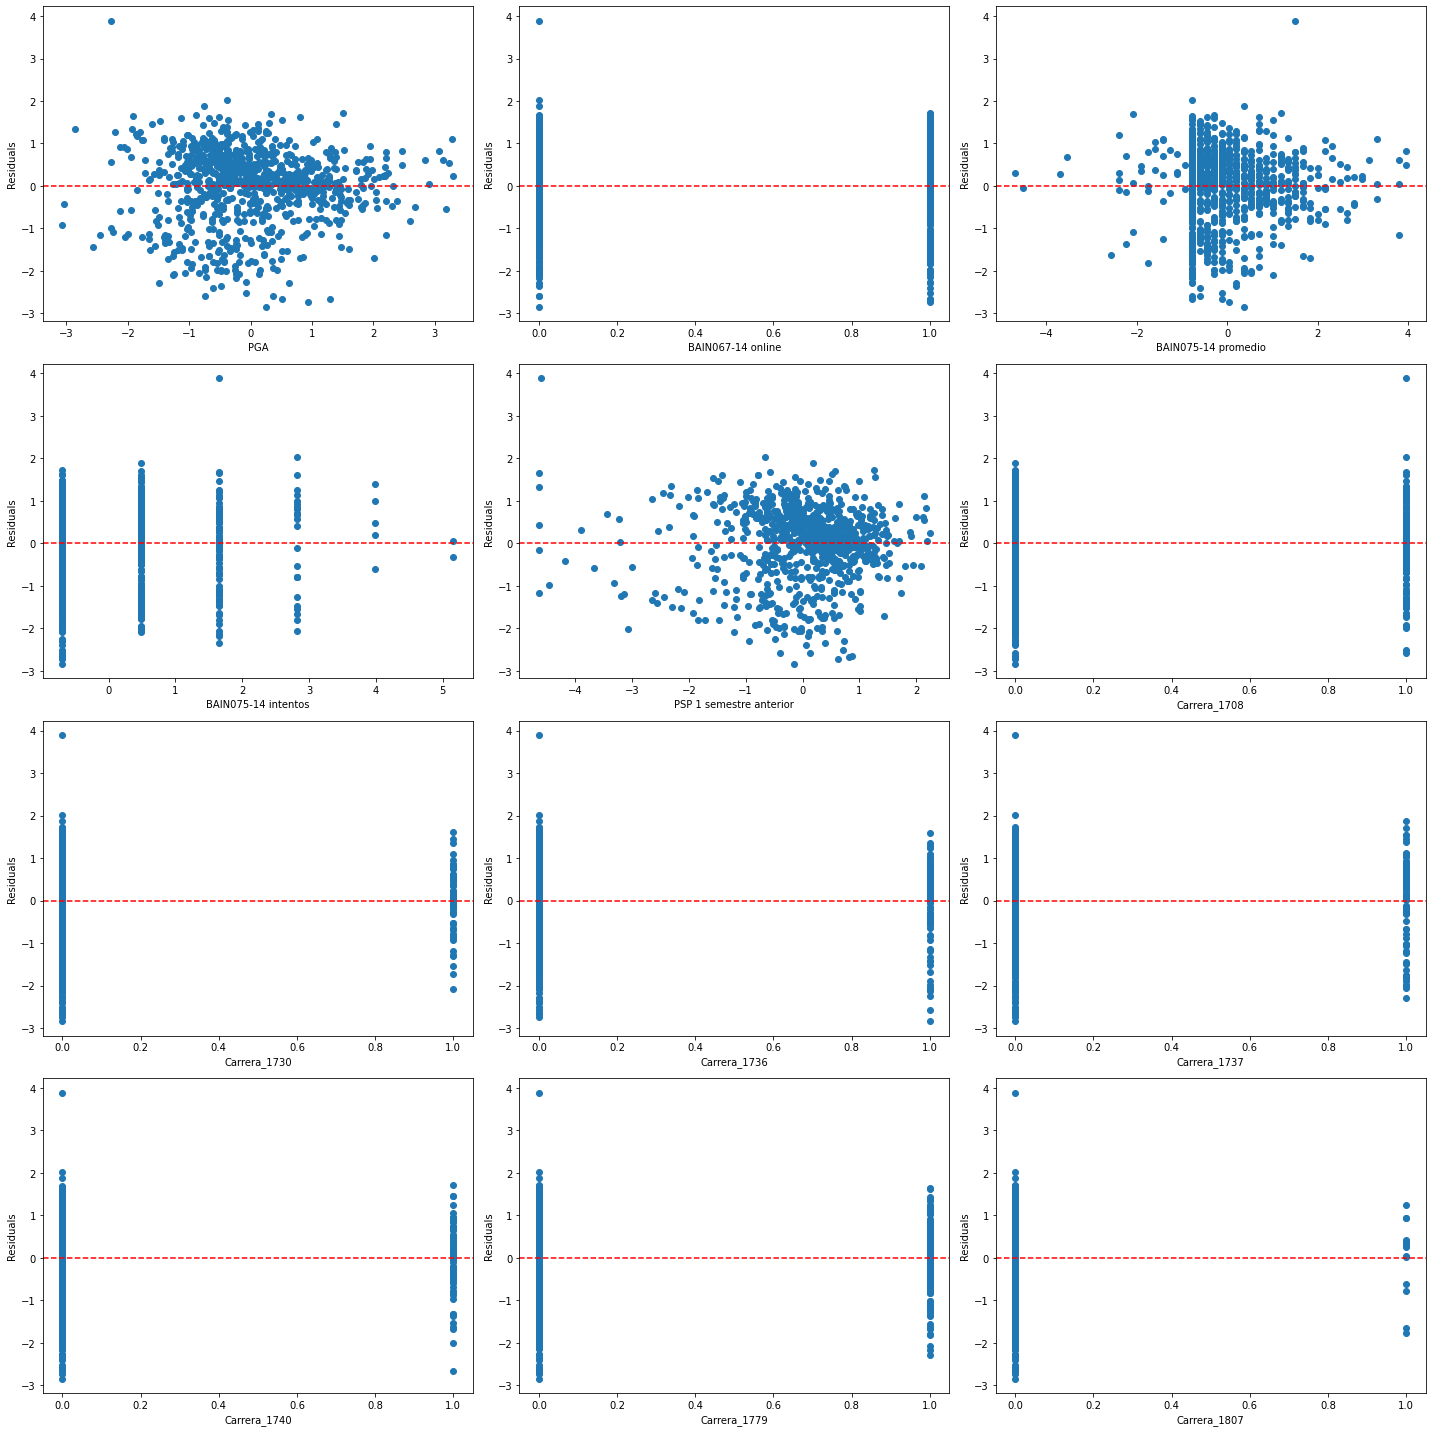

In [37]:
num_plots = len(columns)
num_cols = 3
num_rows = -(-num_plots // num_cols)  # Redondeo hacia arriba para el número de filas

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))  # Ajusta el tamaño de la figura según tu preferencia

for idx, var_name in enumerate(columns):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]  # Manejo de subplots en una fila

    # Gráfico de dispersión de residuos para cada variable con la línea horizontal en y=0
    residuals = Y - hatY
    ax.scatter(X[var_name], residuals)
    ax.axhline(0, color='red', linestyle='--')
    ax.set_xlabel(var_name)
    ax.set_ylabel('Residuals')

# Oculta los subplots que no se están utilizando si el número de gráficos no llena completamente la última fila
for idx in range(num_plots, num_rows * num_cols):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    ax.axis('off')

plt.tight_layout()
plt.show()

In [38]:
print(stats.shapiro(resid))

ShapiroResult(statistic=0.9597031474113464, pvalue=1.067452604173319e-14)


Text(0, 0.5, 'Residuals')

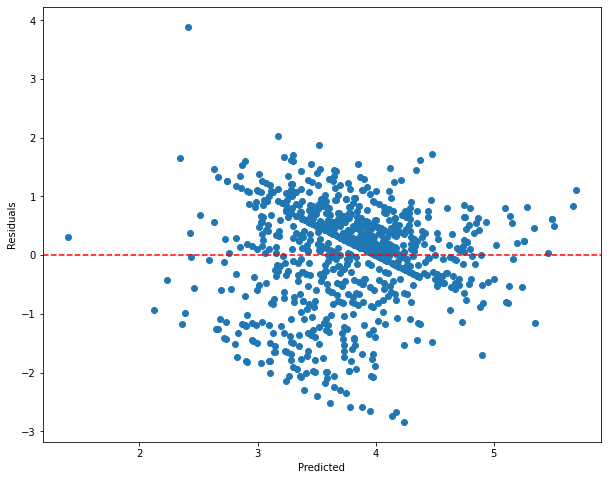

In [39]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(hatY, resid)
ax.axhline(0, color='red', linestyle='--')
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


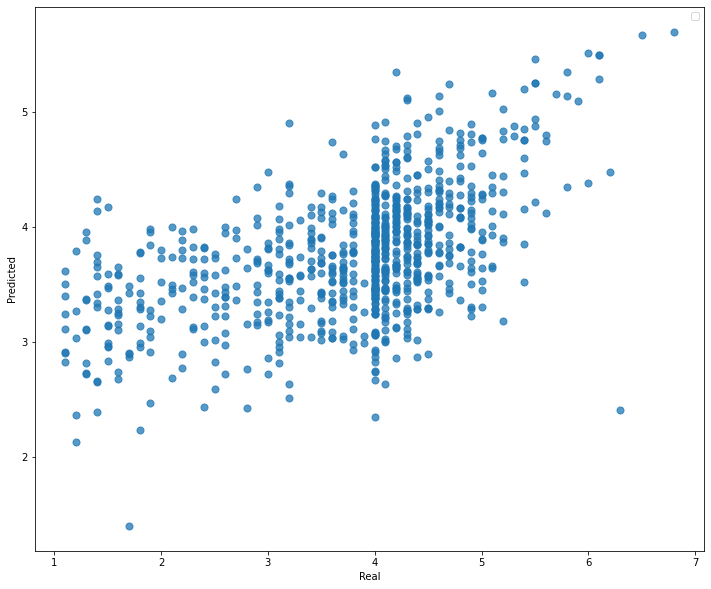

In [40]:
fig, ax = plt.subplots(figsize=(12, 10))

# Gráfico de dispersión
ax.scatter(Y, hatY, alpha=0.75, s=50)

ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
ax.legend()
plt.show()

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X.iloc[:,1:].columns
vif["VIF"] = [variance_inflation_factor(X.iloc[:,1:].values, i) for i in range(X.iloc[:,1:].shape[1])]
vif = vif[vif['Variable']!='intercept']
vif = vif[vif['Variable']!='const']
display(vif)

,Variable,VIF
0,PGA,3.535872
1,BAIN067-14 online,1.556537
2,BAIN075-14 promedio,1.430728
3,BAIN075-14 intentos,1.186780
4,PSP 1 semestre anterior,2.997749
5,Carrera_1708,1.148182
6,Carrera_1730,1.043104
7,Carrera_1736,1.072737
8,Carrera_1737,1.102081
9,Carrera_1740,1.116209


# F-test lineal general

In [46]:
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

df_new = datos_st_encoded.copy()
df_new.columns = [f"x{i}" for i in range(0, len(df_new.columns))]
m1 = smf.ols('x0~x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32', data=df_new).fit()
m2 = smf.ols('x0~x2+x4+x11+x15+x16+x18+x19+x20+x21+x22+x23+x24+x25', data=df_new).fit()
anovaResults = anova_lm(m2, m1)
display(anovaResults)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,852.0,662.338629,0.0,NaN,NaN,NaN
1,833.0,633.170723,19.0,29.167907,2.019649,0.006118


# Regresión polinomial

In [47]:
aux = datos_st_encoded.copy()
aux['PSP 1 semestre anterior (2)'] = aux['PSP 1 semestre anterior']**2
aux['BAIN075-14 intentos (2)'] = aux['BAIN075-14 intentos']**2
aux['BAIN075-14 promedio (2)'] = aux['BAIN075-14 promedio']**2

In [50]:
Y = datos_st_encoded.iloc[:,0]
X = aux[['PGA', 'BAIN067-14 online', 'BAIN075-14 promedio', 'BAIN075-14 promedio (2)',
                      'BAIN075-14 intentos', 'BAIN075-14 intentos (2)',
                      'PSP 1 semestre anterior', 'PSP 1 semestre anterior (2)',  
              'Carrera_1708', 'Carrera_1730', 'Carrera_1736', 'Carrera_1737', 'Carrera_1740', 
              'Carrera_1779', 'Carrera_1807']]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

hatY = model.predict(X)
resid = Y - hatY

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     BAIN081-14 promedio   R-squared:                       0.293
Model:                             OLS   Adj. R-squared:                  0.280
Method:                  Least Squares   F-statistic:                     23.47
Date:                 Mon, 18 Dec 2023   Prob (F-statistic):           2.62e-54
Time:                         15:54:55   Log-Likelihood:                -1111.8
No. Observations:                  866   AIC:                             2256.
Df Residuals:                      850   BIC:                             2332.
Df Model:                           15                                         
Covariance Type:             nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           3.9530      0.076     51.777      0.000       3.803       4.103
PGA                             0.2665      0.064      4.174      0.000       0.141       0.392
BAIN067-14 online              -0.3084      0.067     -4.586      0.000      -0.440      -0.176
BAIN075-14 promedio             0.1082      0.038      2.829      0.005       0.033       0.183
BAIN075-14 promedio (2)         0.0128      0.016      0.820      0.413      -0.018       0.043
BAIN075-14 intentos            -0.1145      0.049     -2.353      0.019      -0.210      -0.019
BAIN075-14 intentos (2)         0.0062      0.021      0.296      0.768      -0.035       0.047
PSP 1 semestre anterior         0.2044      0.076      2.680      0.008       0.055       0.354
PSP 1 semestre anterior (2)     0.0156      0.019      0.812      0.417      -0.022       0.053
Carrera_1708                   -0.2017      0.095     -2.120      0.034      -0.388      -0.015
Carrera_1730                   -0.1363      0.131     -1.042      0.297      -0.393       0.120
Carrera_1736                    0.0935      0.109      0.860      0.390      -0.120       0.307
Carrera_1737                   -0.2610      0.113     -2.319      0.021      -0.482      -0.040
Carrera_1740                   -0.0848      0.119     -0.711      0.477      -0.319       0.149
Carrera_1779                   -0.0910      0.097     -0.942      0.347      -0.281       0.099
Carrera_1807                   -0.7660      0.248     -3.090      0.002      -1.253      -0.279
==============================================================================
Omnibus:                       58.167   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.406
Skew:                          -0.636   Prob(JB):                     8.49e-16
Kurtosis:                       3.552   Cond. No.                         26.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## F-test lineal general entre regresión lineal y polinomial

In [53]:
df_new = aux.copy()
df_new.columns = [f"x{i}" for i in range(0, len(df_new.columns))]
m1 = smf.ols('x0~x2+x4+x11+x15+x16+x18+x19+x20+x21+x22+x23+x24+x25+x33+x34+x35', data=df_new).fit()
m2 = smf.ols('x0~x2+x4+x11+x15+x16+x18+x19+x20+x21+x22+x23+x24+x25', data=df_new).fit()
anovaResults = anova_lm(m2, m1)
display(anovaResults)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,852.0,662.338629,0.0,NaN,NaN,NaN
1,849.0,660.938651,3.0,1.399979,0.599441,0.615484
